# Baselines Ejemplificación (No funciona)
## Modelo de prueba
Con distancia interatómica de 2.78 Angstroms y hacemos un radcut de 15 A, y de igual manera lo visualizamos con jmol

In [6]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import subprocess as sbp

coords1 = cs.cubeShell(10,2.78,'fcc')
coords1 = cs.sphericalShave(coords1,5)

coords2 = cs.cubeShell(10,2.78,'fcc')
coords2 = cs.sphericalShave(coords2,10)

coords3 = cs.cubeShell(14,2.78,'fcc')
coords3 = cs.sphericalShave(coords3,15)


name1='5.xyz'
name2 = '10.xyz'
name3 = '15.xyz'

cs.tomakeshell_wxyz(coords1,'Pt',name1)
cs.tomakeshell_wxyz(coords2,'Pt',name2)
cs.tomakeshell_wxyz(coords3,'Pt',name3)

#sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

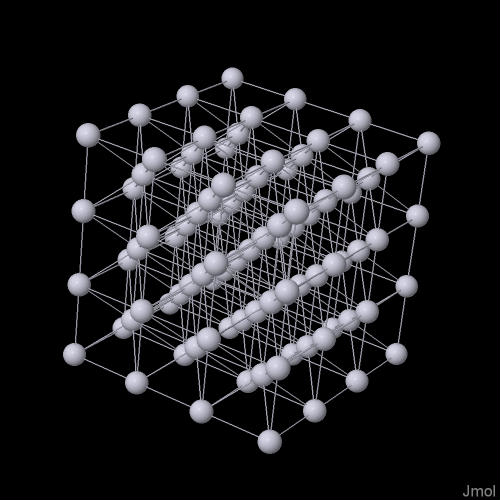

Hacemos el atpos y hacemos un .ini con lammpin
Nota: en caso de ser un .ini monoelemento es necesario cambiar manualmente 2 atom types en name.ini

In [24]:
atpos1, eleList1 = cs.atpos_eleList_maker(coords1,'Pt')
atpos2, eleList2 = cs.atpos_eleList_maker(coords2,'Pt')
atpos3, eleList3 = cs.atpos_eleList_maker(coords3,'Pt')

from myfuncions.lammpin_f import wlammpin

wlammpin(atpos1,eleList1,name1)
wlammpin(atpos2,eleList2,name2)
wlammpin(atpos3,eleList3,name3)

5.ini
10.ini
15.ini


In [42]:
input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name1[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 100

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		1000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 200 {name1[:-4]}_d.xyz
 run		200
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

In [43]:
input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name2[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 100

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		1000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 200 {name2[:-4]}_d.xyz
 run		200
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

In [44]:
input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name3[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 100

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		1000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 200 {name3[:-4]}_d.xyz
 run		200
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

## Aquí se hace el PDF y la gráfica
oquettrnr

el proximo código arregla el problema de path

In [10]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

In [45]:
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', '5_d.xyz'])
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', '10_d.xyz'])
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', '15_d.xyz'])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', '15_d.xyz'], returncode=0)

In [47]:
import PDF.runner as pdf
#name = 'ejem1.xyz'
pdf.run_pdf('5_d.xyz', dir_actual, 1600,0.02)
pdf.run_pdf('10_d.xyz', dir_actual, 1600,0.02)
pdf.run_pdf('15_d.xyz', dir_actual, 1600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\Baseline1

          43  atomos          903  pares 
 Rango de distancias    2.59302020     -   9.45700169    
 Distancias promedio    5.51691151    
 Factor de normalizacion    187.179474    

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\Baseline1

         249  atomos        30876  pares 
 Rango de distancias    2.55287528     -   19.0168896    
 Distancias promedio    9.91206455    
 Factor de normalizacion    3737.07227    

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\Baseline1

         959  atomos       459361  pares 
 Rango de distancias    2.55414033     -   29.9833107    
 Distancias promedio    15.5125017    
 Factor de normalizacion    36082.5625    



Hacemos la gráfica PDF

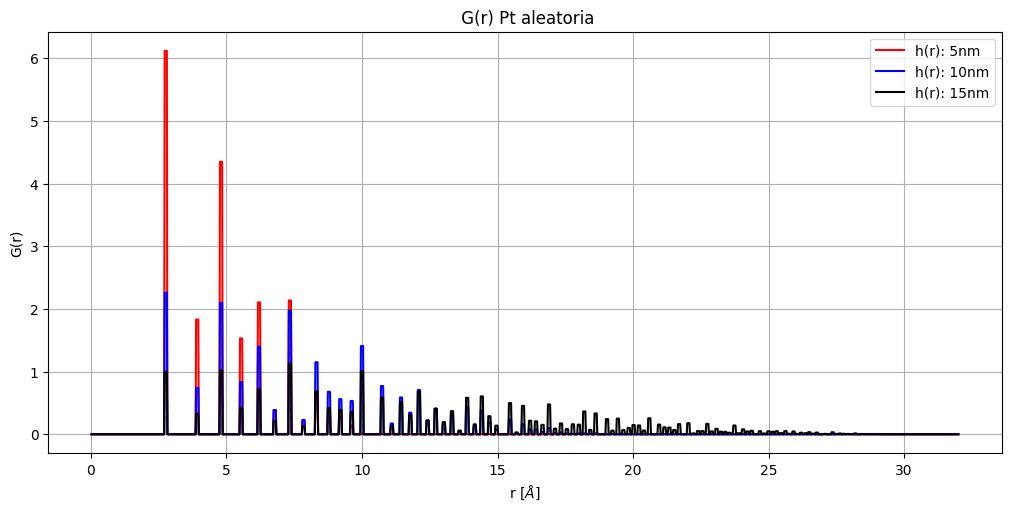

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


df_1= pd.read_csv(f'{name1[:-4]}.txt', sep='\s+')
df_2= pd.read_csv(f'{name2[:-4]}.txt', sep='\s+')
df_3= pd.read_csv(f'{name3[:-4]}.txt', sep='\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_1['#r(A)'], df_1['G(r)'] + df_1['Base'], label='h(r): 5nm', color = 'red')
ax.plot(df_2['#r(A)'], df_2['G(r)'] + df_2['Base'], label='h(r): 10nm', color = 'blue')
ax.plot(df_3['#r(A)'], df_3['G(r)'] + df_3['Base'], label='h(r): 15nm', color = 'black')

ax.set_xlabel('r [$\\AA$]')
#ax.set_xlim([0,15])
ax.set_ylabel('G(r)')
ax.set_title(' G(r) Pt aleatoria')
ax.grid('True', linestyle='-')
ax.legend()
plt.show()

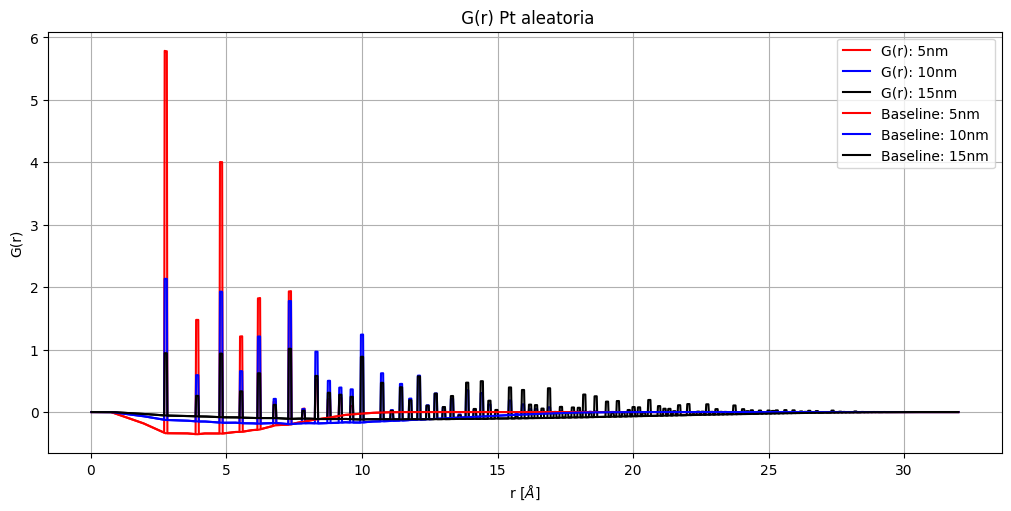

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


df_1= pd.read_csv(f'{name1[:-4]}.txt', sep='\s+')
df_2= pd.read_csv(f'{name2[:-4]}.txt', sep='\s+')
df_3= pd.read_csv(f'{name3[:-4]}.txt', sep='\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')

ax.plot(df_1['#r(A)'], df_1['G(r)'], label='G(r): 5nm', color = 'red')
ax.plot(df_2['#r(A)'], df_2['G(r)'], label='G(r): 10nm', color = 'blue')
ax.plot(df_3['#r(A)'], df_3['G(r)'], label='G(r): 15nm', color = 'black')


ax.plot(df_1['#r(A)'], -df_1['Base'], label='Baseline: 5nm', color = 'red')
ax.plot(df_2['#r(A)'], -df_2['Base'], label='Baseline: 10nm', color = 'blue')
ax.plot(df_3['#r(A)'], -df_3['Base'], label='Baseline: 15nm', color = 'black')


ax.set_xlabel('r [$\\AA$]')
#ax.set_xlim([0,15])
ax.set_ylabel('G(r)')
ax.set_title(' G(r) Pt aleatoria')
ax.grid('True', linestyle='-')
ax.legend()
plt.show()